In [1]:
from pylab import *

In [2]:
ls

 compute_msd_t0.1.txt       compute_t0.4_r0.015.txt    compute_t0.7_r0.0250.txt
 compute_t0.1_r0.015.txt    compute_t0.4_r0.0250.txt   compute_t0.7_r0.025.txt
 compute_t0.1_r0.0250.txt   compute_t0.4_r0.025.txt    compute_t0.7_r0.0300.txt
 compute_t0.1_r0.025.txt    compute_t0.4_r0.0300.txt   compute_t0.7_r0.030.txt
 compute_t0.1_r0.0300.txt   compute_t0.4_r0.030.txt    compute_t0.7_r0.0350.txt
 compute_t0.1_r0.030.txt    compute_t0.4_r0.0350.txt   compute_t0.7_r0.035.txt
 compute_t0.1_r0.0350.txt   compute_t0.4_r0.035.txt    compute_t0.7_r0.250.txt
 compute_t0.1_r0.035.txt    compute_t0.4_r0.250.txt    compute_t0.7_r0.300.txt
 compute_t0.1_r0.250.txt    compute_t0.4_r0.300.txt    compute_t0.7_r0.350.txt
 compute_t0.1_r0.300.txt    compute_t0.4_r0.350.txt    compute_t0.7.txt
 compute_t0.1_r0.350.txt    compute_t0.4.txt           compute_t1.0_r0.015.txt
 compute_t0.1.txt           compute_t0.5_r0.015.txt    compute_t1.0_r0.0250.txt
 compute_t0.2_r0.015.txt    compute_t0.5_r0.0250.txt   

In [3]:
ts = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1.0]) #, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0]

temp = zeros(len(ts))
press = zeros(len(ts))



In [4]:
for i, ti in enumerate(ts):
    _, PRESS, TEMP = loadtxt("compute_t{}.txt".format(ti)).T
    press[i] = PRESS[-1] #PRESS[-5000:].mean()
    temp[i] = TEMP[-1] #TEMP[-5000:].mean()

In [5]:
%matplotlib inline

# Pressure with respect temperature for last round of executed loop

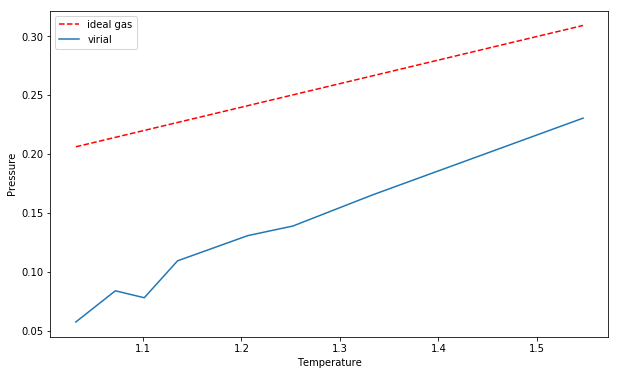

In [6]:
figure(figsize=(10, 6))

xlabel("Temperature")
ylabel("Pressure")
plot(temp, 0.2*temp, 'r--', label="ideal gas") # k_B is assumed 1
plot(temp, press, label="virial")
legend()
show()

# Pressure with respect to mean temperature

In [7]:
for i, ti in enumerate(ts):
    _, PRESS, TEMP = loadtxt("compute_t{}.txt".format(ti)).T
    press[i] = PRESS[-5000:].mean()
    temp[i]  = TEMP[-5000:].mean()

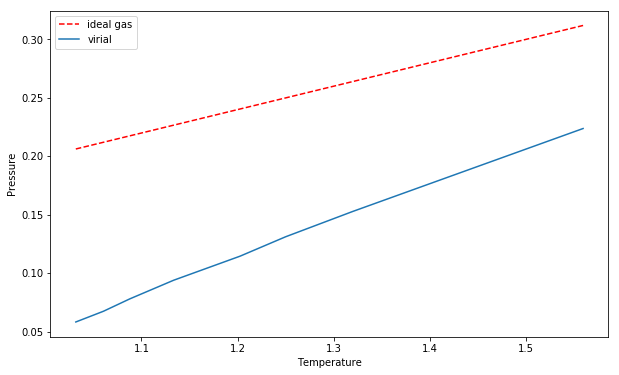

In [8]:
figure(figsize=(10, 6))

xlabel("Temperature")
ylabel("Pressure")
plot(temp, 0.2*temp, 'r--', label="ideal gas")
plot(temp, press, label="virial")
legend()
show()

In [9]:
ls

 compute_msd_t0.1.txt       compute_t0.4_r0.015.txt    compute_t0.7_r0.0250.txt
 compute_t0.1_r0.015.txt    compute_t0.4_r0.0250.txt   compute_t0.7_r0.025.txt
 compute_t0.1_r0.0250.txt   compute_t0.4_r0.025.txt    compute_t0.7_r0.0300.txt
 compute_t0.1_r0.025.txt    compute_t0.4_r0.0300.txt   compute_t0.7_r0.030.txt
 compute_t0.1_r0.0300.txt   compute_t0.4_r0.030.txt    compute_t0.7_r0.0350.txt
 compute_t0.1_r0.030.txt    compute_t0.4_r0.0350.txt   compute_t0.7_r0.035.txt
 compute_t0.1_r0.0350.txt   compute_t0.4_r0.035.txt    compute_t0.7_r0.250.txt
 compute_t0.1_r0.035.txt    compute_t0.4_r0.250.txt    compute_t0.7_r0.300.txt
 compute_t0.1_r0.250.txt    compute_t0.4_r0.300.txt    compute_t0.7_r0.350.txt
 compute_t0.1_r0.300.txt    compute_t0.4_r0.350.txt    compute_t0.7.txt
 compute_t0.1_r0.350.txt    compute_t0.4.txt           compute_t1.0_r0.015.txt
 compute_t0.1.txt           compute_t0.5_r0.015.txt    compute_t1.0_r0.0250.txt
 compute_t0.2_r0.015.txt    compute_t0.5_r0.0250.txt   

In [10]:
rhos = [0.0150, 0.0250, 0.0300, 0.0350]
rhos = array(rhos)

press = zeros((len(ts), len(rhos)))
temps = zeros((len(ts), len(rhos)))

In [11]:
for i, ti in enumerate(ts):
    for j, rho in enumerate(rhos):
        _, PRESS, TEMP = loadtxt("compute_t{}_r{:.3f}.txt".format(ti, rho)).T
        press[i, j] = PRESS[-5000:].mean()
        temps[i, j] = TEMP[-5000:].mean()

No handlers could be found for logger "matplotlib.legend"


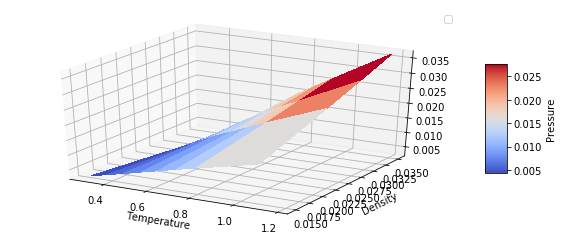

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


fig = figure(figsize=(10, 4))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(temps, rhos[None, :], press, cmap=cm.coolwarm, linewidth=0, antialiased=False)
xlabel("Temperature")
ylabel("Density")
fig.colorbar(surf, shrink=0.5, aspect=5, label="Pressure")
legend()
show()

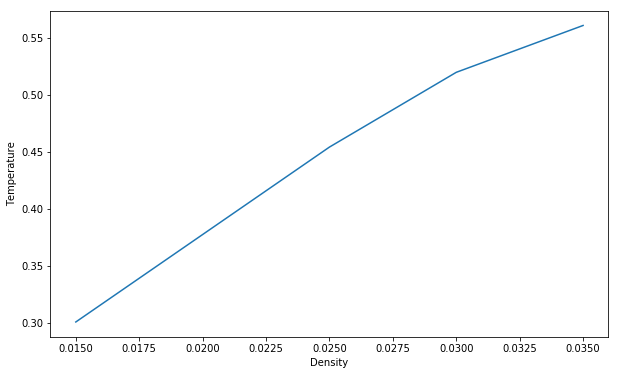

In [13]:
figure(figsize=(10, 6))
xlabel("Density")
ylabel("Temperature")
plot(rhos, temps[0, :])
show()

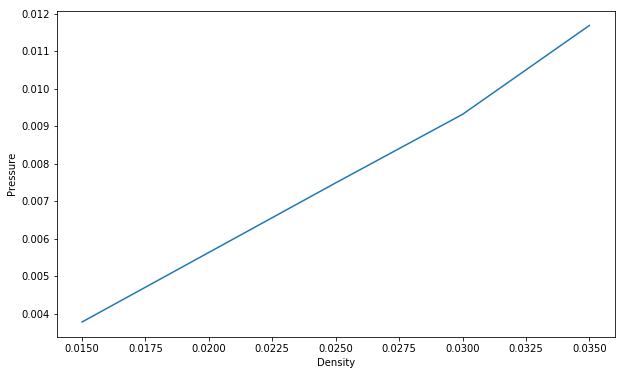

In [14]:
figure(figsize=(10, 6))
xlabel("Density")
ylabel("Pressure")
plot(rhos, press[1, :])
show()